In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [135]:
alpha = pd.read_csv('/Users/cgarg/Documents/UMAFall_Subject_01_ADL_Bending_1_2016-06-13_20-25-34.csv',delimiter=';')
data_slice = alpha[(alpha[' Sensor Type'] == 0) & (alpha[' Sensor ID'] == 1)]
df= data_slice.copy()
df.info()
df.sort_values(by=['TimeStamp'])
print(df[['TimeStamp',' X-Axis', ' Y-Axis', ' Sensor Type', ' Sensor ID']]) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 2973 to 3272
Data columns (total 8 columns):
TimeStamp       300 non-null int64
 Sample No      300 non-null int64
 X-Axis         300 non-null float64
 Y-Axis         300 non-null float64
 Z-Axis         300 non-null float64
 Sensor Type    300 non-null int64
 Sensor ID      300 non-null int64
                0 non-null float64
dtypes: float64(4), int64(4)
memory usage: 21.1 KB
      TimeStamp    X-Axis    Y-Axis   Sensor Type   Sensor ID
2973        172  0.935547 -0.087158             0           1
2974        190  0.954102 -0.081543             0           1
2975        204  0.954102 -0.081543             0           1
2976        212  0.954102 -0.081543             0           1
2977        239  0.998535 -0.185303             0           1
...         ...       ...       ...           ...         ...
3268      14786  0.922363 -0.040527             0           1
3269      14830  0.929443 -0.034912             0          

In [136]:
df.info()
df.reset_index(inplace = True)
print(df.index)
print(df[['TimeStamp',' X-Axis', ' Y-Axis', ' Sensor Type', ' Sensor ID']]) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 2973 to 3272
Data columns (total 8 columns):
TimeStamp       300 non-null int64
 Sample No      300 non-null int64
 X-Axis         300 non-null float64
 Y-Axis         300 non-null float64
 Z-Axis         300 non-null float64
 Sensor Type    300 non-null int64
 Sensor ID      300 non-null int64
                0 non-null float64
dtypes: float64(4), int64(4)
memory usage: 21.1 KB
RangeIndex(start=0, stop=300, step=1)
     TimeStamp    X-Axis    Y-Axis   Sensor Type   Sensor ID
0          172  0.935547 -0.087158             0           1
1          190  0.954102 -0.081543             0           1
2          204  0.954102 -0.081543             0           1
3          212  0.954102 -0.081543             0           1
4          239  0.998535 -0.185303             0           1
..         ...       ...       ...           ...         ...
295      14786  0.922363 -0.040527             0           1
296      14830  0.929443 -0.0

In [137]:
# df.loc[df['v-x'] = 0]
df['v-x'] = 0
df['v-y'] = 0
df['v-z'] = 0
df['Cum-X'] = 0
df['Cum-Y'] = 0
df['Cum-Z'] = 0
print(df[['TimeStamp',' X-Axis', 'v-x', 'Cum-X',' Y-Axis', 'v-y', 'Cum-Y',' Z-Axis', 'v-z', 'Cum-Z']].head(30))

    TimeStamp    X-Axis  v-x  Cum-X    Y-Axis  v-y  Cum-Y    Z-Axis  v-z  \
0         172  0.935547    0      0 -0.087158    0      0  0.439453    0   
1         190  0.954102    0      0 -0.081543    0      0  0.312256    0   
2         204  0.954102    0      0 -0.081543    0      0  0.312256    0   
3         212  0.954102    0      0 -0.081543    0      0  0.312256    0   
4         239  0.998535    0      0 -0.185303    0      0  0.335205    0   
5         290  1.093750    0      0 -0.330322    0      0  0.347900    0   
6         341  0.866211    0      0 -0.138916    0      0  0.398438    0   
7         396  0.823242    0      0 -0.132080    0      0  0.286865    0   
8         434  0.938721    0      0 -0.147705    0      0  0.280273    0   
9         483  1.108643    0      0 -0.038574    0      0  0.328369    0   
10        532  1.095947    0      0  0.125244    0      0  0.236328    0   
11        581  0.979248    0      0  0.165771    0      0  0.149170    0   
12        63

In [138]:
for i in range(1, len(df)): 
    df.loc[i, 'v-x'] = df.loc[i-1, 'v-x'] + (df.loc[i-1, ' X-Axis'] * 9.81* (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'Cum-X'] = df.loc[i-1, 'Cum-X'] + (df.loc[i, 'v-x'] * (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'v-y'] = df.loc[i-1, 'v-y'] + (df.loc[i-1, ' Y-Axis'] * 9.81* (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'Cum-Y'] = df.loc[i-1, 'Cum-Y'] + (df.loc[i, 'v-y'] * (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'v-z'] = df.loc[i-1, 'v-z'] + (df.loc[i-1, ' Z-Axis'] * 9.81* (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'Cum-Z'] = df.loc[i-1, 'Cum-Z'] + (df.loc[i, 'v-z'] * (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))


print(df[['TimeStamp',' X-Axis', 'v-x', 'Cum-X',' Y-Axis', 'v-y', 'Cum-Y',' Z-Axis', 'v-z', 'Cum-Z']])

     TimeStamp    X-Axis            v-x         Cum-X    Y-Axis           v-y  \
0          172  0.935547       0.000000  0.000000e+00 -0.087158      0.000000   
1          190  0.954102     165.198867  2.973580e+03 -0.081543    -15.390396   
2          204  0.954102     296.235176  7.120872e+03 -0.081543    -26.589507   
3          212  0.954102     371.113066  1.008978e+04 -0.081543    -32.988999   
4          239  0.998535     623.825947  2.693308e+04 -0.185303    -54.587285   
..         ...       ...            ...           ...       ...           ...   
295      14786  0.922363  131831.926897  9.609606e+08 -0.040527  -9992.476538   
296      14830  0.929443  132230.055784  9.667787e+08 -0.034912 -10009.969761   
297      14879  0.919678  132676.829912  9.732798e+08 -0.040283 -10026.751663   
298      14931  0.914062  133145.975918  9.802034e+08 -0.044434 -10047.300930   
299      14978  0.918213  133567.422715  9.864811e+08 -0.043457 -10067.787927   

            Cum-Y    Z-Axis

     index  TimeStamp   Sample No    X-Axis    Y-Axis    Z-Axis   Sensor Type  \
0     2973        172           0  0.935547 -0.087158  0.439453             0   
1     2974        190           1  0.954102 -0.081543  0.312256             0   
2     2975        204           2  0.954102 -0.081543  0.312256             0   
3     2976        212           3  0.954102 -0.081543  0.312256             0   
4     2977        239           4  0.998535 -0.185303  0.335205             0   
..     ...        ...         ...       ...       ...       ...           ...   
295   3268      14786         295  0.922363 -0.040527  0.423828             0   
296   3269      14830         296  0.929443 -0.034912  0.428467             0   
297   3270      14879         297  0.919678 -0.040283  0.437012             0   
298   3271      14931         298  0.914062 -0.044434  0.426514             0   
299   3272      14978         299  0.918213 -0.043457  0.431885             0   

      Sensor ID            

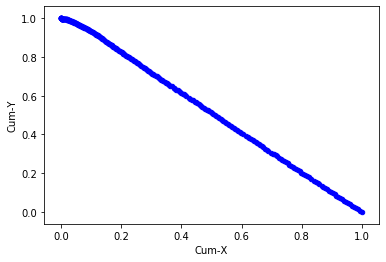

In [139]:
scaler = MinMaxScaler()
df[['Cum-X', 'Cum-Y']] = scaler.fit_transform(df[['Cum-X', 'Cum-Y']])
print(df)
df.plot(kind='scatter',x='Cum-X',y='Cum-Y',color='blue')

     index  TimeStamp   Sample No    X-Axis    Y-Axis    Z-Axis   Sensor Type  \
0     2973        172           0  0.935547 -0.087158  0.439453             0   
1     2974        190           1  0.954102 -0.081543  0.312256             0   
2     2975        204           2  0.954102 -0.081543  0.312256             0   
3     2976        212           3  0.954102 -0.081543  0.312256             0   
4     2977        239           4  0.998535 -0.185303  0.335205             0   
..     ...        ...         ...       ...       ...       ...           ...   
295   3268      14786         295  0.922363 -0.040527  0.423828             0   
296   3269      14830         296  0.929443 -0.034912  0.428467             0   
297   3270      14879         297  0.919678 -0.040283  0.437012             0   
298   3271      14931         298  0.914062 -0.044434  0.426514             0   
299   3272      14978         299  0.918213 -0.043457  0.431885             0   

      Sensor ID            

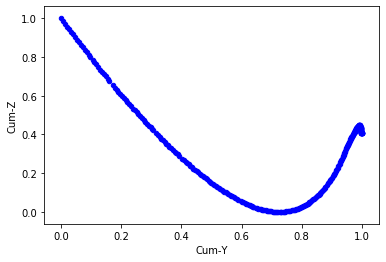

In [140]:
scaler = MinMaxScaler()
df[['Cum-Y', 'Cum-Z']] = scaler.fit_transform(df[['Cum-Y', 'Cum-Z']])
print(df)
df.plot(kind='scatter',x='Cum-Y',y='Cum-Z',color='blue')

     index  TimeStamp   Sample No    X-Axis    Y-Axis    Z-Axis   Sensor Type  \
0     2973        172           0  0.935547 -0.087158  0.439453             0   
1     2974        190           1  0.954102 -0.081543  0.312256             0   
2     2975        204           2  0.954102 -0.081543  0.312256             0   
3     2976        212           3  0.954102 -0.081543  0.312256             0   
4     2977        239           4  0.998535 -0.185303  0.335205             0   
..     ...        ...         ...       ...       ...       ...           ...   
295   3268      14786         295  0.922363 -0.040527  0.423828             0   
296   3269      14830         296  0.929443 -0.034912  0.428467             0   
297   3270      14879         297  0.919678 -0.040283  0.437012             0   
298   3271      14931         298  0.914062 -0.044434  0.426514             0   
299   3272      14978         299  0.918213 -0.043457  0.431885             0   

      Sensor ID            

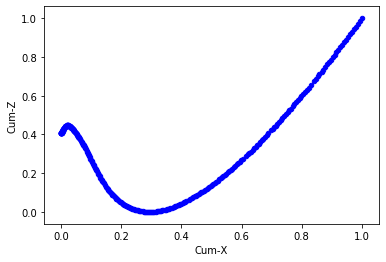

In [141]:
scaler = MinMaxScaler()
df[['Cum-X', 'Cum-Z']] = scaler.fit_transform(df[['Cum-X', 'Cum-Z']])
print(df)
df.plot(kind='scatter',x='Cum-X',y='Cum-Z',color='blue')

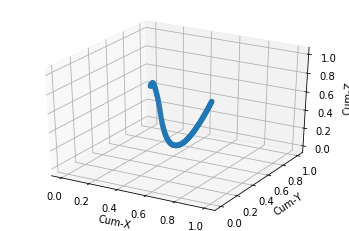

In [142]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['Cum-X'], df['Cum-Y'], df['Cum-Z'])
threedee.set_xlabel('Cum-X')
threedee.set_ylabel('Cum-Y')
threedee.set_zlabel('Cum-Z')
plt.show()